# Dataset 2

## https://archive.ics.uci.edu/dataset/489/parkinson+dataset+with+replicated+acoustic+features

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../Dataframes/dataset2.csv')
data.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [5]:
data.shape

(240, 48)

## XGBoost

In [8]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
data2 = data.copy()
data2 = data2.drop(['ID'], axis = 1)

In [10]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

XGB_classifier = XGBClassifier(random_state=45)

XGB_classifier.fit(X_train, y_train)

y_pred = XGB_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 0.75


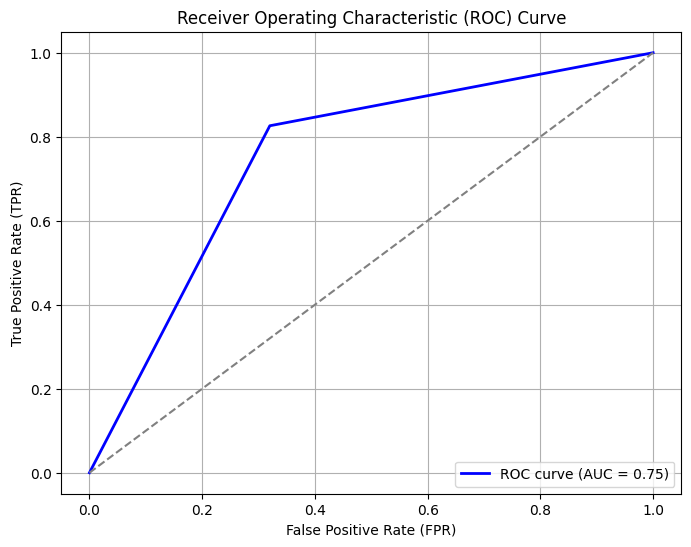

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Support Vector Machine

In [12]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
data2 = data.copy()
data2 = data2.drop(['ID'], axis = 1)

### Linear

In [16]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'linear')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.75


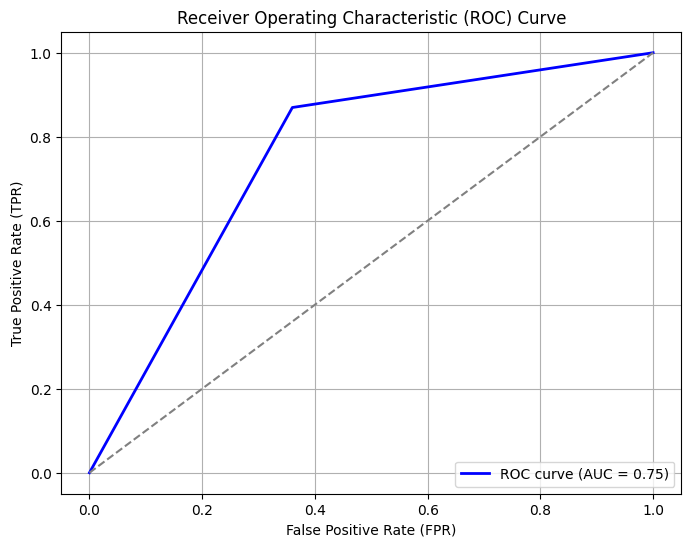

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Polynomial

In [18]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'poly')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.75


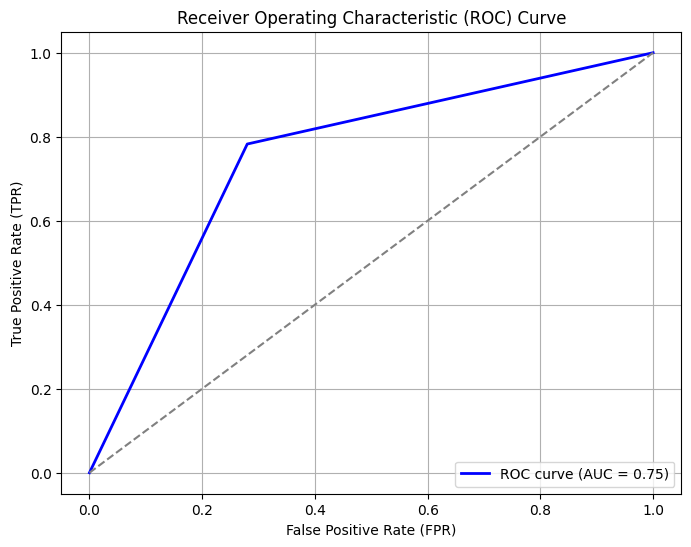

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Radial Basis Function

In [20]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'rbf')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.79


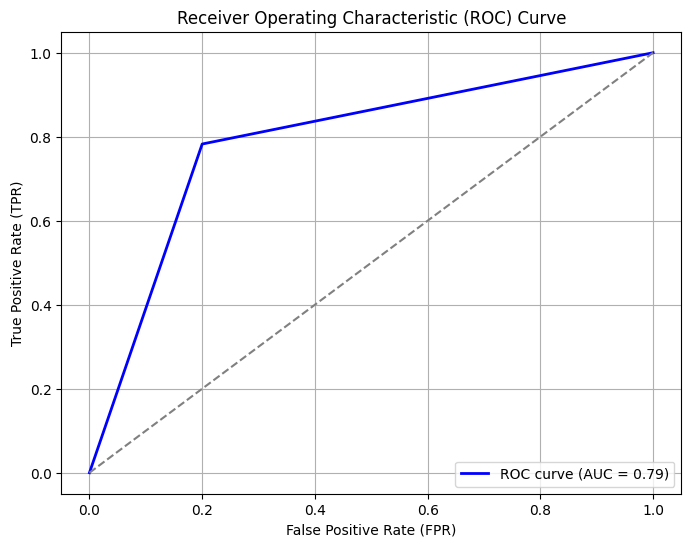

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Sigmoid Kernel

In [22]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'sigmoid')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.27


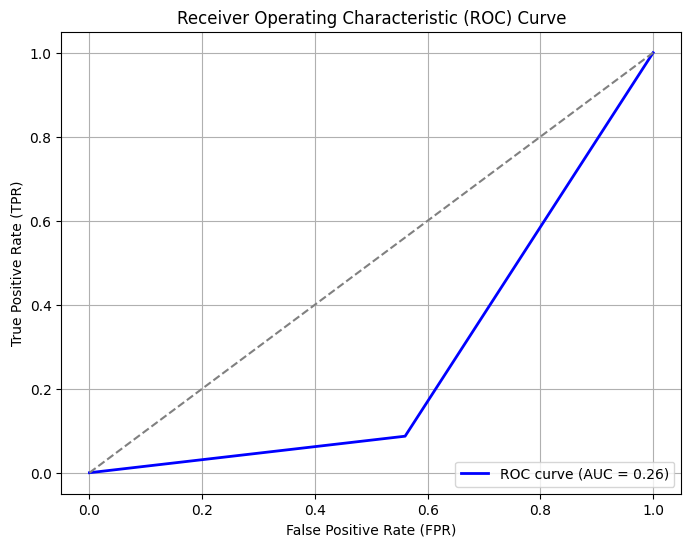

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Random Forest

In [24]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
data2 = data.copy()
data2 = data2.drop(['ID'], axis = 1)

In [26]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

XGB_classifier = XGBClassifier(random_state=45)

XGB_classifier.fit(X_train, y_train)

y_pred = XGB_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45)

RF_Classifier.fit(X_train, y_train)

y_pred = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 0.75
Accuracy of the Random Forest Classifier: 0.79


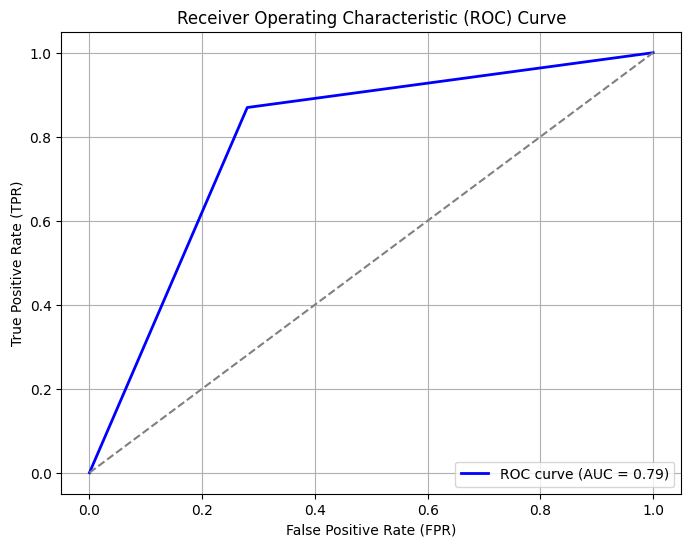

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [28]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
data2 = data.copy()
data2 = data2.drop(['ID'], axis = 1)

In [30]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive_Bayes_classifier = GaussianNB()

Naive_Bayes_classifier.fit(X_train, y_train)

y_pred = Naive_Bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 0.81


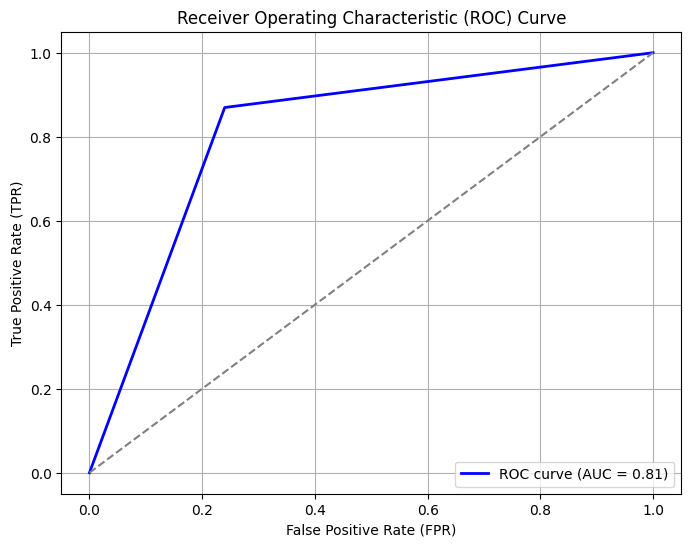

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## KNN

In [35]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
data2 = data.copy()
data2 = data2.drop(['ID'], axis = 1)

In [37]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')

Accuracy of the KNN Classifier: 0.81


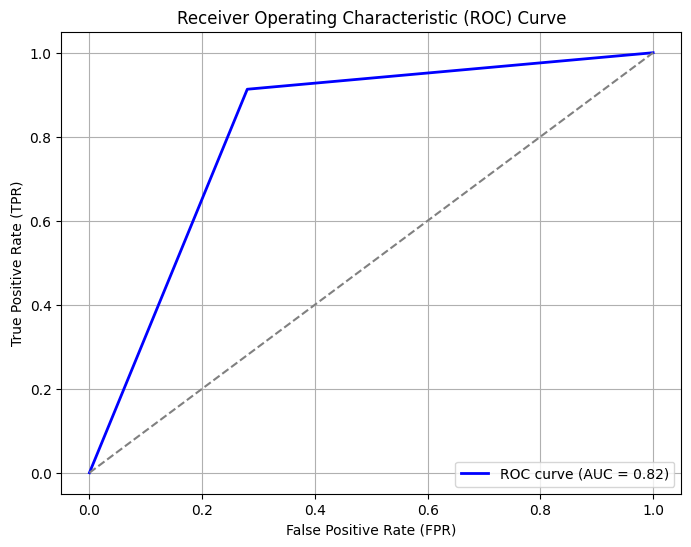

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Combined analaysis